In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv("2022data.csv")

In [3]:
data.shape

(366, 11)

In [4]:
data.sample(5)

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
318,2022-11-15,10.3,6.3,13.4,6.1,0.0,115.0,6.5,27.7,1010.3,40.0
135,2022-05-16,18.8,12.6,27.5,2.2,0.0,277.0,13.3,51.5,1018.0,277.0
251,2022-09-09,15.8,12.5,21.7,5.3,0.0,219.0,14.4,38.5,1013.1,110.0
183,2022-07-03,23.0,12.5,31.0,0.0,0.0,233.0,13.0,40.7,1018.0,857.0
362,2022-12-29,10.8,6.3,12.5,4.1,0.0,221.0,29.5,72.4,1010.8,24.0


In [5]:
data=data.drop(['time'],axis=1)

In [6]:
data['wdir'].fillna(value=data['wdir'].mean(),inplace=True)

In [7]:
X=data.drop(['tavg'],axis=1)
y=data['tavg']

In [8]:
y

0       9.7
1       8.1
2       9.8
3       7.4
4       3.9
       ... 
361     6.9
362    10.8
363     8.3
364    15.5
365    12.0
Name: tavg, Length: 366, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

In [11]:
lr.score(X_test, y_test)

0.9920200229938098

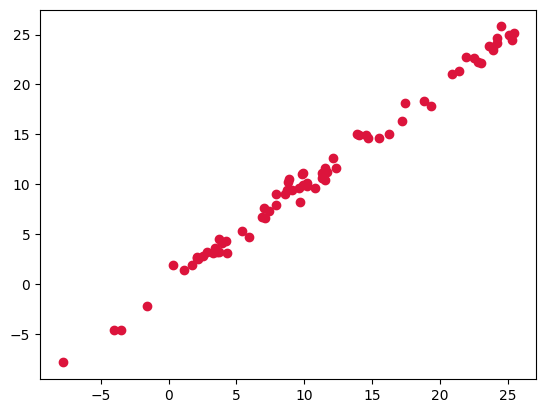

In [12]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, c='crimson')

In [13]:
import pickle
pickle.dump(lr,open('tavg.pkl','wb'))